# Telecommunication customer classification

<img style="float:none; position: relative; " src="22389615419_bc76c46a7c_w.jpg"> 

<div style="text-align:center; font-size:70%;"> Photo by Denise Smith, source Flickr.com   <a href="https://www.flickr.com/photos/lensletter/22389615419/in/photolist-A7uCC4-rTLwFc-TsUT2u-2ZQVoR-S87eyp-mxW3ER-8HnozY-mxXVjJ-8HjkYX-8Hnj23-8HnzM7-8HjdLt-mzubKP-8HnxLo-mzuC8a-8Hj9Le-mxEKo4-2jHqguB-mzHMYs-mxEfvg-mxG4Ey-mxELWp-mxELPR-mxEK6v-mxG4NE-o2UTo6-o2UTbx-nKHLR3-Kjy4Ag-pbozY3-o36bsY-o3d7qZ-mxELsD-mxG66u-mxG53N-mxEf2R-mxEgWc-mxEgLx-mxEgpv-mxEgh6-mxG3nU-mxEKPK-mxEfbt-mxEJDP-mxEeHV-mxMJ6m-mxLrUK-mxKVbx-mxLqdZ-mxKSKv">(Link)</a></div> 


In this notebook we analyse and predict the churn (unsatisfaction) of customers of a telecommunication company.

## Description of data

The data set contains information about customers of a telecommunication company that can be found here <a href="https://www.kaggle.com/radmirzosimov/telecom-users-dataset"> Kaggle Link.</a> It contains the following columns:

<ul>
<li>'Unnamed: 0' = index. </li>
<li> 'customerID' = identification number. </li>
<li>'gender' = gender of the customer. </li>
<li> 'SeniorCitizen' = senior citizen or not. </li>
<li>'Partner' = married or not.</li>
<li>'Dependents' = dependents yes or no.</li>
<li> 'tenure' = number of months the customer uses service. </li>
<li> 'PhoneService' = customer uses phone service or not.</li>
<li> 'MultipleLines'= customer uses multiple lines or not.</li>
<li> 'InternetService' = customer uses internet service or not.</li>
<li> 'OnlineSecurity'=  customer uses online security service or not. </li>
<li>'OnlineBackup' =  customer uses online backup service or not. </li>
<li>  'DeviceProtection' =  customer uses device protection service or not.</li>
<li>'TechSupport' =  customer uses technical support service or not. </li>
<li>'StreamingTV' =  customer uses TV streaming service or not.  </li>
<li> 'StreamingMovies' =  customer uses movie streaming service or not.</li>    
<li>'Contract' = type of contract.</li>
<li> 'PaperlessBilling' =  customer uses paperless billing service or not.</li>
<li>'PaymentMethod' = payment method.</li>
<li> 'MonthlyCharges' = amount of monthly costs.</li>
<li>'TotalCharges' = amount of total costs. </li>
<li>'Churn' = measure of (un)satisfaction of a customer ('Yes'=unsatisfied customer, 'No'=satisfied)</li>
</ul> 

## Goals:
<ul>
<li> Analysis and visualization of the data. </li>
<li> Classification of satisfied and unsatisfied customers. </li>
</ul>
  

## Strategies:
We use the following models:
<ul>
<li>SVM.</li>
<li>Logistic regression.</li>
<li>Random forests.</li>
</ul>

## Outline:

1. [Analysis](#ana)<br>
2. [Classification models](#cla) <br>
3. [ Model selection and prediction ](#mod)<br>



## 1. Analysis <a id="ana"></a>

In [47]:
#Loading libraries.
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score,
                             f1_score, precision_recall_curve, roc_curve, roc_auc_score, auc)
from sklearn.model_selection import GridSearchCV

In [48]:
#Loading the data.
path = os.getcwd()
path_data = path + '/telecom_users.csv'
df = pd.read_csv(path_data) 

In [49]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [50]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [51]:
# TotalCharges is a string, transfrom it into a float.
A = df.TotalCharges.apply(lambda x: float(x) if x!=' ' else 0)
df['TotalNum'] = A #new column 'TotalNum' replaces the original 'TotalCharges'

In [52]:
df.describe()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalNum
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,3533.561310,0.161377,32.468760,64.802213,2294.221559
std,2035.705666,0.367909,24.516391,30.114702,2274.164124
min,0.000000,0.000000,0.000000,18.250000,0.000000
25%,1777.250000,0.000000,9.000000,35.650000,401.587500
50%,3546.500000,0.000000,29.000000,70.400000,1408.575000
75%,5291.750000,0.000000,56.000000,89.900000,3841.500000
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


In [53]:
df.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
TotalNum            5611
dtype: int64

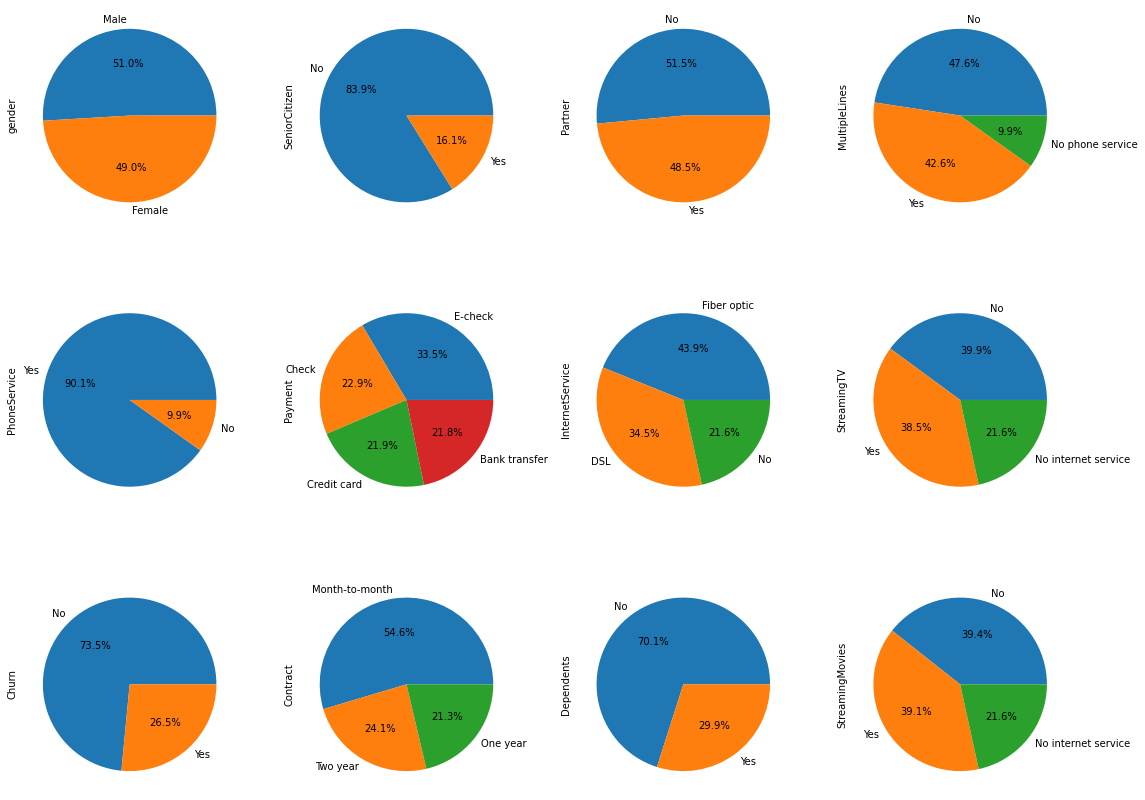

In [54]:
#Plot of the proportions of the categorical attributes.
fig, ax = plt.subplots(3,4,figsize=(16,12))
df.gender.value_counts().plot.pie(autopct="%.1f%%", ax=ax[0][0])
df.SeniorCitizen.value_counts().plot.pie(autopct="%.1f%%", ax=ax[0][1], labels={"No":0, "Yes":1})
df.Partner.value_counts().plot.pie(autopct="%.1f%%", ax=ax[0][2])
df.PaymentMethod.value_counts().plot.pie(autopct="%.1f%%", ax=ax[1][1],
                                         labels={"E-check":"Electronic check",
                                                        "Check":"Mailed check",
                                                        "Credit card":"Credit card (automatic)",
                                                        "Bank transfer":"Bank transfer (automatic)"})
ax[1][1].set_ylabel('Payment')
df.PhoneService.value_counts().plot.pie(autopct="%.1f%%", ax=ax[1][0])
df.MultipleLines.value_counts().plot.pie(autopct="%.1f%%", ax=ax[0][3])
df.InternetService.value_counts().plot.pie(autopct="%.1f%%", ax=ax[1][2])
df.StreamingTV.value_counts().plot.pie(autopct="%.1f%%", ax=ax[1][3])
df.Churn.value_counts().plot.pie(autopct="%.1f%%", ax=ax[2][0])
df.Contract.value_counts().plot.pie(autopct="%.1f%%", ax=ax[2][1])
df.Dependents.value_counts().plot.pie(autopct="%.1f%%", ax=ax[2][2])
df.StreamingMovies.value_counts().plot.pie(autopct="%.1f%%", ax=ax[2][3])
fig.tight_layout()

array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalNum'}>, <AxesSubplot:>]],
      dtype=object)

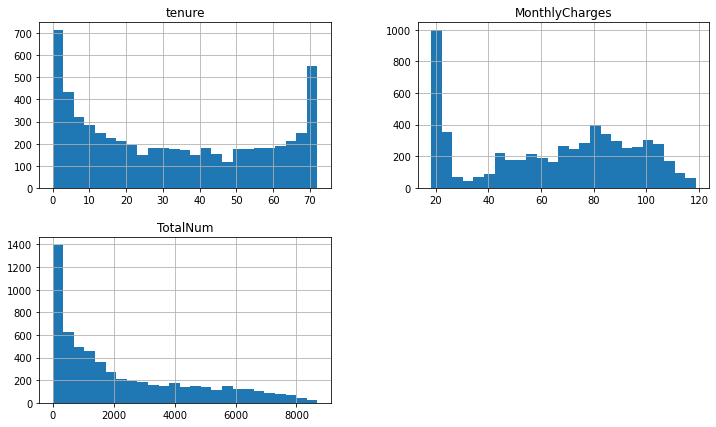

In [55]:
#Distribution of numerical attributes.
df[["tenure", "MonthlyCharges", "TotalNum"]].hist(bins=25, figsize=(12,7))

### Churn accross different categories
In the following we consider the distribution of churn accross other attributes and accross their combinations.

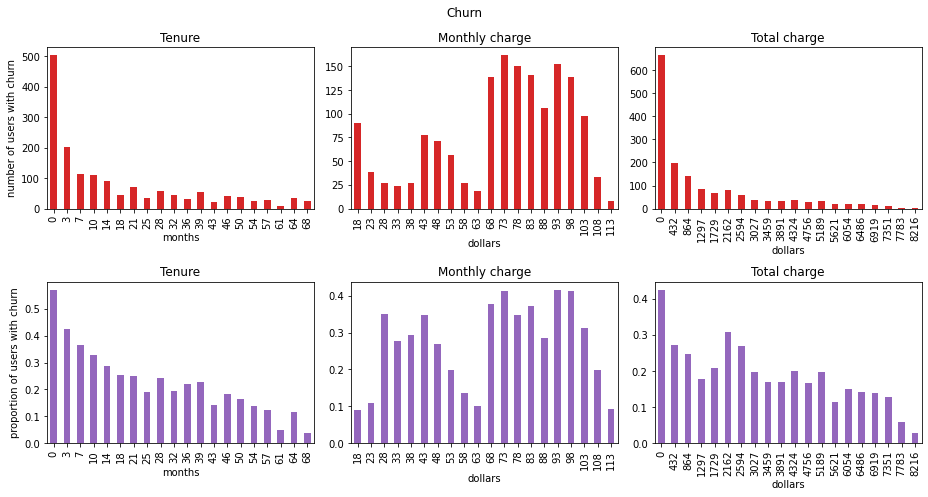

In [56]:
#Absolute and relative number of users with churn for segments of: tenure, MonthlyCharges and TotalNum. 
#We divide the users into a number of segments according to the above attributes.
a = 20 #number of segments
labels_ten = [int(i * 72/a) for i in range(a)]
A = pd.cut(df.tenure, bins=a, labels=labels_ten)
Ch_index = df[df.Churn=='Yes'].index
B_ten = A[Ch_index].value_counts()
C_ten = B_ten / A.value_counts()
labels_mon = [int(18.25 + i * (118.75-18.25)/a) for i in range(a)]
A = pd.cut(df.MonthlyCharges, bins=a, labels=labels_mon)
Ch_index = df[df.Churn=='Yes'].index
B_mon = A[Ch_index].value_counts()
C_mon = B_mon / A.value_counts()
labels_tot = [int(i * 8648.8/a) for i in range(a)]
A = pd.cut(df.TotalNum, bins=a, labels=labels_tot)
Ch_index = df[df.Churn=='Yes'].index
B_tot = A[Ch_index].value_counts()
C_tot = B_tot / A.value_counts()

#Plots.
fig, ax = plt.subplots(2,3, figsize=(13,7))
fig.suptitle('Churn')
ax[0][0].set_xlabel('months')
ax[1][0].set_xlabel('months')
ax[0][1].set_xlabel('dollars')
ax[1][1].set_xlabel('dollars')
ax[0][2].set_xlabel('dollars')
ax[1][2].set_xlabel('dollars')
ax[0][0].set_ylabel('number of users with churn')
ax[1][0].set_ylabel('proportion of users with churn') 
C_ten.sort_index().plot(kind='bar', ax=ax[1][0], color='tab:purple', title='Tenure')
C_mon.sort_index().plot(kind='bar', ax=ax[1][1], color='tab:purple', title='Monthly charge')
C_tot.sort_index().plot(kind='bar', ax=ax[1][2], color='tab:purple', title='Total charge')
B_ten.sort_index().plot(kind='bar', ax=ax[0][0], color='tab:red', title='Tenure')
B_mon.sort_index().plot(kind='bar', ax=ax[0][1], color='tab:red', title='Monthly charge')
B_tot.sort_index().plot(kind='bar', ax=ax[0][2], color='tab:red', title='Total charge')
fig.tight_layout()

<AxesSubplot:xlabel='TotalNum', ylabel='MonthlyCharges'>

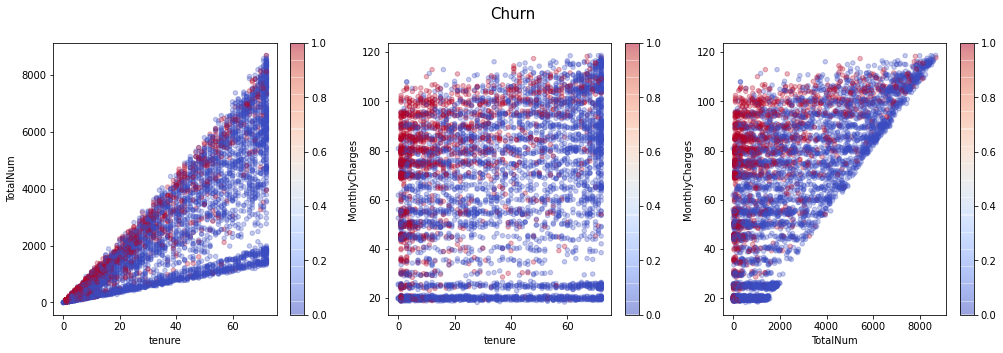

In [57]:
#Distribution of churn in combinations of: 'tenure', 'MonthlyCharges' and 'TotalNum'.
C = (df.Churn == 'Yes')
fig, ax = plt.subplots(1,3, figsize=(17,5))
fig.suptitle("Churn", fontsize=15)
df.plot.scatter(x='tenure', y='TotalNum', c=C.apply(lambda x: float(x)), colormap='coolwarm', alpha=0.3, ax=ax[0])
df.plot.scatter(x='tenure', y='MonthlyCharges', c=C.apply(lambda x: float(x)), colormap='coolwarm',
                alpha=0.3, ax=ax[1])
df.plot.scatter(x='TotalNum', y='MonthlyCharges',
                c=C.apply(lambda x: float(x)), colormap='coolwarm', alpha=0.3, ax=ax[2])

In [58]:
#Same as above considering all three attributes in one graph.
fig = px.scatter_3d(df, x='tenure', y='MonthlyCharges', z='TotalNum',
              color='Churn')
fig.show()

Text(110.75, 0.5, 'proportion of users with churn')

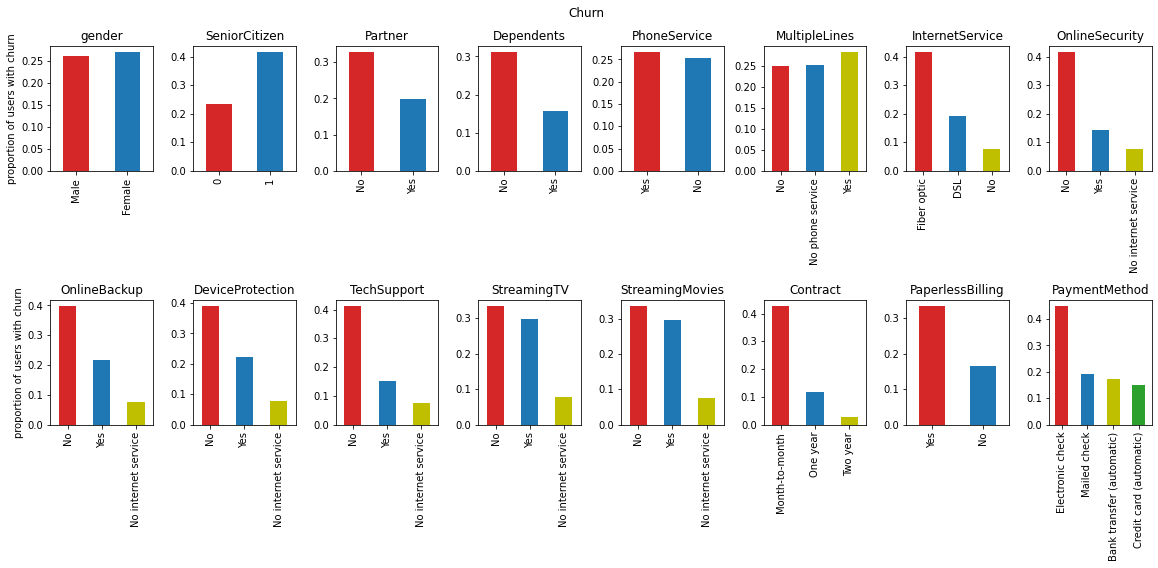

In [59]:
#Proportion of users with churn in different categories according to categorical attributes.
fig, ax = plt.subplots(2,8, figsize=(16,8))
fig.suptitle('Churn')
col_cat = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']
for i in range(16):
    A = df[df.Churn == 'Yes']
    C = A[col_cat[i]].value_counts() / df[col_cat[i]].value_counts()
    if i <= 7:
        C.plot(kind='bar', color=['tab:red', 'tab:blue', 'y', 'tab:green'], title=col_cat[i], ax=ax[0][i])
    else: 
        C.plot(kind='bar', color=['tab:red', 'tab:blue', 'y', 'tab:green'], title=col_cat[i], ax=ax[1][i-8])        
fig.tight_layout()
ax[0][0].set_ylabel("proportion of users with churn")
ax[1][0].set_ylabel("proportion of users with churn")

#### Some simple observations:
<ul>
<li> New customers tend to cancel their contracts more than long term customers.</li>
<li> Senior citizens, single people and people with no dependents tend to be more unsatisfied (or more easily cancel their contract) than their counterparts.</li>
<li>Month-to-month contracts are canceled more often than long term contacts.</li>
<li>Customers who do not use but have modern digital services (online security, online backup, device protection, tech support) at their disposal tend to be more unsatisfied.</li>
</ul>

## 2. Classification models <a id="cla"></a>

In [60]:
#Dropping unnecessary columns and selecting labels for classification.
DF = df.drop(columns=['Unnamed: 0', 'customerID', 'TotalCharges', 'Churn']).copy() #relevant attributes.
y = (df.Churn == 'Yes') #labels.

In [61]:
#Pipeline: encodes categorical attributes and scales numerical attributes.
num_attribs = ['tenure', 'MonthlyCharges', 'TotalNum'] #numerical attributes (scaling)
cat_attribs_binary = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                      'PhoneService', 'PaperlessBilling'] #binary categorical atributes (encoder)
cat_attribs_multi = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                     'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaymentMethod'] # multivalued categorical attributes (one hot encoder)
pipe = ColumnTransformer([('num', StandardScaler(), num_attribs),
                            ('cat_bi',  OrdinalEncoder(), cat_attribs_binary),
                           ('cat_mu_1', OneHotEncoder(), cat_attribs_multi)])
X = pipe.fit_transform(DF) #transformed data set.

In [62]:
#Selecting a train and test sets in ratio 8:2.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

Confusion matrix: 
       0    1
0  2958  558
1   586  686
Scores:
Accuracy on training set     0.757728
Cross validation accuracy    0.761069
Precision                    0.551447
Recall                       0.539308
f1 score                     0.545310
Roc auc score                0.796921
dtype: float64


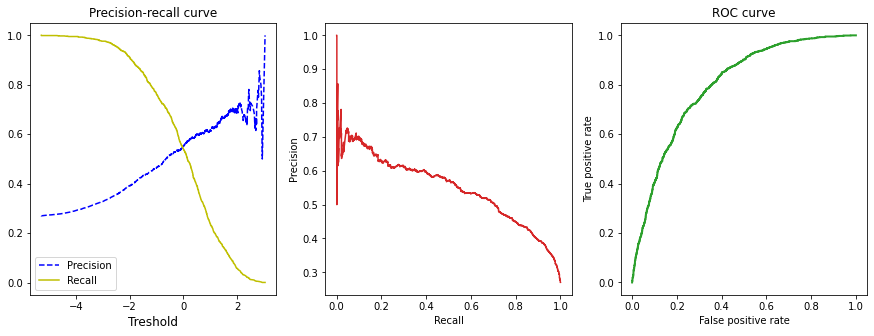

In [63]:
#Support vector machine classifier via SGD.
sgd_clf = SGDClassifier(loss='hinge', random_state=0)
sgd_clf.fit(X_train, y_train)

#(Cross validation) Predictions on training set and scores vector.
y_pred = sgd_clf.predict(X_train)
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, tresholds = precision_recall_curve(y_train, y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

#Standard classification metrics on training set (using cross validation).
def scores(y_train, y_pred, y_train_pred, y_scores):
    a = accuracy_score(y_train, y_train_pred)
    b = accuracy_score(y_train, y_pred)
    d = precision_score(y_train, y_train_pred)
    e = recall_score(y_train, y_train_pred)
    f = f1_score(y_train, y_train_pred)
    g = roc_auc_score(y_train, y_scores)
    S = pd.Series([b, a, d, e, f, g], index=['Accuracy on training set',
                                                  'Cross validation accuracy', 'Precision', 'Recall', 
                                                  'f1 score', 'Roc auc score'])
    return S

#Print of scores.
print('Confusion matrix: \n', pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
print('Scores:')
print(scores(y_train, y_pred, y_train_pred, y_scores))

#Plots of standard classification metrics.
def scores_plot(tresholds, precisions, recalls, fpr, tpr):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].plot(tresholds, precisions[:-1], 'b--', label='Precision')
    ax[0].plot(tresholds, recalls[:-1], 'g-', label='Recall', c='y')
    ax[0].set_title('Precision-recall curve')
    ax[0].set_xlabel('Treshold', fontsize=12)
    ax[0].legend()
    ax[1].plot(recalls, precisions, c='tab:red')
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[2].plot(fpr, tpr, linewidth=2, c='tab:green')
    ax[2].set_title('ROC curve')
    ax[2].set_xlabel('False positive rate')
    ax[2].set_ylabel('True positive rate')
    plt.show()
    
scores_plot(tresholds, precisions, recalls, fpr, tpr)

Confusion matrix: 
       0    1
0  3115  401
1   596  676
Scores:
Accuracy on training set     0.802840
Cross validation accuracy    0.791771
Precision                    0.627669
Recall                       0.531447
f1 score                     0.575564
Roc auc score                0.836786
dtype: float64


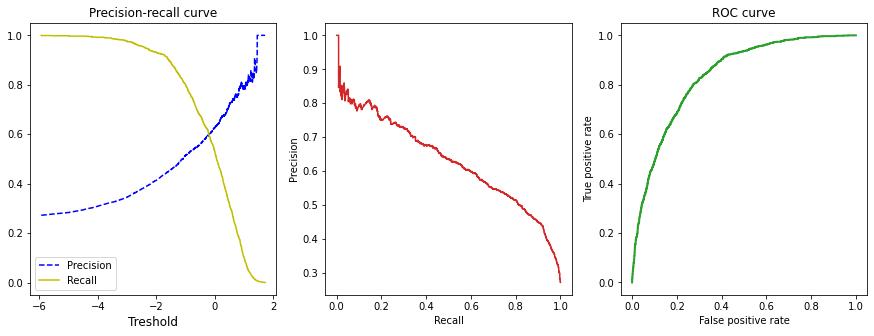

In [64]:
#Logistic regression.
reg_clf = LogisticRegression(random_state=0)
reg_clf.fit(X_train, y_train)

#(Cross validation) Predictions on training set and scores vector.
y_pred = reg_clf.predict(X_train)
y_train_pred = cross_val_predict(reg_clf, X_train, y_train, cv=3)
y_scores = cross_val_predict(reg_clf, X_train, y_train, cv=3, method="decision_function")
precisions, recalls, tresholds = precision_recall_curve(y_train, y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

#Standard classification metrics on training set (using cross validation).
print('Confusion matrix: \n', pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
print('Scores:')
print(scores(y_train, y_pred, y_train_pred, y_scores))

#Plot of some metrics.
scores_plot(tresholds, precisions, recalls, fpr, tpr)

Confusion matrix: 
       0    1
0  3142  374
1   655  617
Scores:
Accuracy on training set     0.998120
Cross validation accuracy    0.785088
Precision                    0.622603
Recall                       0.485063
f1 score                     0.545294
Roc auc score                0.816351
dtype: float64


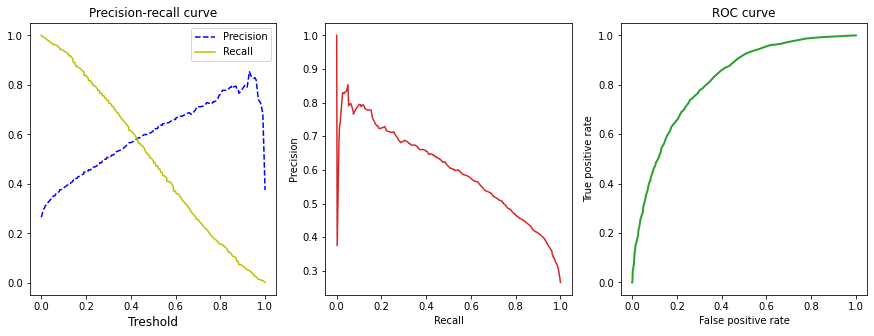

In [65]:
#Random forest classifier.
forest_clf = RandomForestClassifier(random_state=0)
forest_clf.fit(X_train, y_train)

#(Cross validation) Predictions on training set and scores vector.
y_pred = forest_clf.predict(X_train)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)
y_probas = cross_val_predict(forest_clf, X_train, y_train, cv=3, method='predict_proba')
y_scores = y_probas[:,1]
precisions, recalls, tresholds = precision_recall_curve(y_train, y_scores)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

#Scores.
print('Confusion matrix: \n', pd.DataFrame(confusion_matrix(y_train, y_train_pred)))
print('Scores:')
print(scores(y_train, y_pred, y_train_pred, y_scores))
scores_plot(tresholds, precisions, recalls, fpr, tpr)

## 3. Model selection and prediction <a id="mod"></a>
The logistic regression model outperforms SVM (low accuracy) and the random forest model (overfitting). We select this model and tune its hyperparameters in the following. Also, we evaluate the predictions of this model on the test set.

In [66]:
#Some hyperparameters.
param_grid = [{'penalty':['l1', 'l2'], 'C':[100, 10, 1.0, 0.1, 0.01], 
              'max_iter':[1000]}, {'penalty':['none']}]

#Grid search.
reg_clf = LogisticRegression()
grid_search = GridSearchCV(reg_clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train,y_train)

/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator 

/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator 

/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/mario/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.


/home/mario/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning:

Estimator 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01], 'max_iter': [1000],
                          'penalty': ['l1', 'l2']},
                         {'penalty': ['none']}],
             return_train_score=True, scoring='accuracy')

In [67]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l2'}


Confusion matrix: 
      0    1
0  801   82
1  135  180
Scores:
Accuracy on test set    0.818865
Precision               0.687023
Recall                  0.571429
f1 score                0.623917
Roc auc score           0.849862
dtype: float64


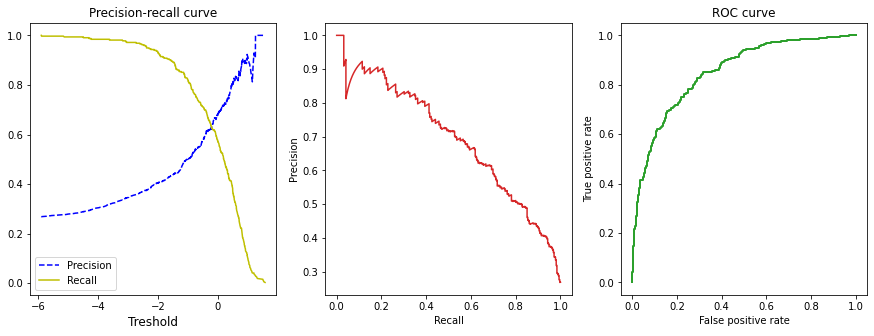

In [68]:
#Logistic regression with best parameters.
reg_clf = grid_search.best_estimator_
reg_clf.fit(X_train, y_train)
y_test_pred = reg_clf.predict(X_test)
b = accuracy_score(y_test, y_test_pred)
c = confusion_matrix(y_test, y_test_pred)
d = precision_score(y_test, y_test_pred)
e = recall_score(y_test, y_test_pred)
f = f1_score(y_test, y_test_pred)
y_scores = reg_clf.decision_function(X_test)
precisions, recalls, tresholds = precision_recall_curve(y_test, y_scores)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
g = roc_auc_score(y_test, y_scores)

S = pd.Series([b, d, e, f, g], index=['Accuracy on test set', 'Precision', 'Recall', 
                                         'f1 score', 'Roc auc score'])

print('Confusion matrix: \n', pd.DataFrame(c))
print('Scores:')
print(S)

scores_plot(tresholds, precisions, recalls, fpr, tpr)

Text(0.5, 1.0, 'Predicted churn')

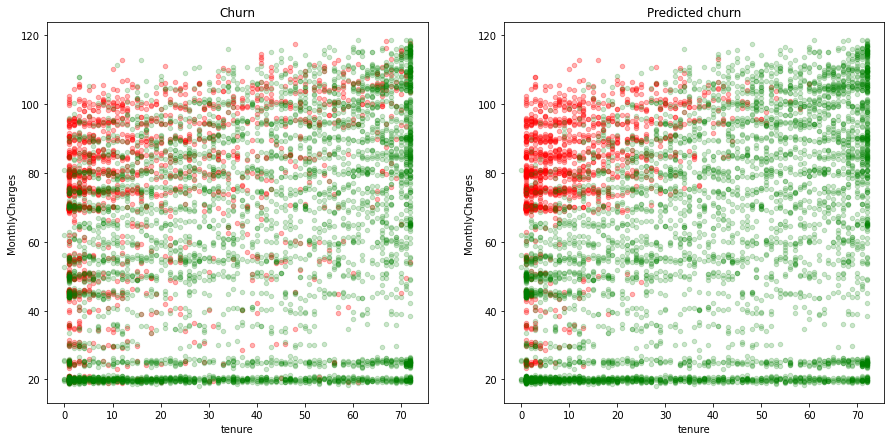

In [69]:
#Visualization of the actual and predicted state of churn on the entire set of customers.
y_pred = reg_clf.predict(X)

A = df.copy()
A['ChurnPred'] = y_pred
fig, ax = plt.subplots(1,2, figsize=(15,7))
df[df.Churn == 'Yes'].plot.scatter(x='tenure', y='MonthlyCharges', color='r', alpha=0.3, ax=ax[0])
df[df.Churn == 'No'].plot.scatter(x='tenure', y='MonthlyCharges', color='g', alpha=0.2, ax=ax[0])
ax[0].set_title("Churn")
A[A.ChurnPred].plot.scatter(x='tenure', y='MonthlyCharges', color='r', alpha=0.3, ax=ax[1])
A[A.ChurnPred == False].plot.scatter(x='tenure', y='MonthlyCharges', color='g', alpha=0.2, ax=ax[1])
ax[1].set_title("Predicted churn")